In [1]:
from __future__ import division
from pylab import *
from scipy import optimize
import numpy as np
import pandas as pd

import Jesse_Funcs_New.JessePlot
import Jesse_Funcs_New.blahut as blahut
import Jesse_Funcs_New.helpers as helpers
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data_file = np.load('C_nonequal_optimized_new_PCM.npz')
test_mat = data_file['data'].item()['C_nonequal']
np.round(test_mat, 2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77],
       [ 1.  ,  1.66,  1.82,  1.88],
       [ 1.  ,  1.81,  1.9 ,  1.93]])

In [3]:
data_file = np.load('C_nonequal_optimized_new_PCM_more_states.npz')
test_mat_new = data_file['data'].item()['C_nonequal']
np.round(test_mat_new, 2)

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.81],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.93],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.86],
       [ 1.  ,  1.56,  1.57,  1.93,  1.99]])

In [4]:
combined_mat_idx = [test_mat>0.0]
test_mat_new[combined_mat_idx] = test_mat[combined_mat_idx]
ys_new = np.round(test_mat_new, 2)
print (ys_new)

[[ 1.    1.    1.    1.    1.  ]
 [ 1.    1.56  1.7   1.77  1.81]
 [ 1.    1.66  1.82  1.88  1.93]
 [ 1.    1.81  1.9   1.93  1.86]
 [ 1.    1.56  1.57  1.93  1.99]]


/home/rzarcone/tensorflow/lib/python3.4/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  


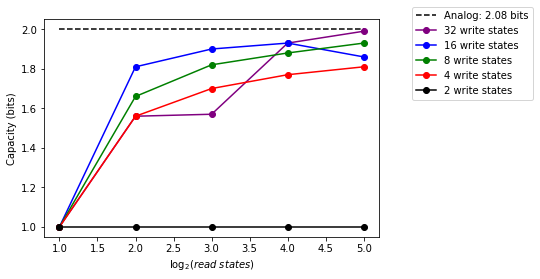

In [5]:
x_plot = np.array([5,4,3,2,1])
x = np.flip(x_plot, axis=0)
colors = ['black', 'red','green','blue', 'purple']
plt.plot(x, 2*np.ones_like(x), c='black' ,linestyle='--')
for i in x_plot:
    plt.plot(x,ys_new[i-1,:], c=colors[i-1], marker='o')
plt.legend(["Analog: 2.08 bits", "32 write states","16 write states", "8 write states", "4 write states", "2 write states"], loc = (1.1,0.63))
plt.xlabel(r"${\log}_{2} \left(read \ states\right)$")
plt.ylabel("Capacity (bits)")